Open XLS file

In [1]:
import pandas as pd
from datetime import datetime as dt
import os
import xlrd
import plotly

In [2]:
df = pd.DataFrame
filepath = os.getcwd()
filename = "data.xls"
df = pd.read_excel(os.path.join(filepath,filename),index_col=0)
df = df.reset_index()
df = df.replace("-", pd.NA)
df.fillna("nan",inplace=True)

Calculate age at start of chancellorship

In [3]:
format_1 = "%Y"

def dt1(x):
    if x["Geburtsjahr"] != "nan":
        return dt.strptime(str(x["Geburtsjahr"]), format_1)
def dt2(x):
    if x["Todesjahr"] != "nan":
        return dt.strptime(str(x["Todesjahr"]), format_1)

df["Amtsantritt"] = pd.to_datetime(df.Amtsantritt)
df["Abtritt"] = pd.to_datetime(df.Abtritt)
df["Geburtsjahr"] = df.apply(dt1, axis=1)
df["Todesjahr"] = df.apply(dt2, axis=1)

In [4]:
def f1(x):
    return int((x["Amtsantritt"] - x["Geburtsjahr"]).days/365.2425)

df["Antrittsalter"] = df.apply(f1, axis=1)

In [5]:
def f2(x):
    try:
        return int((x["Abtritt"] - x["Geburtsjahr"]).days/365.2425)
    except:
        return pd.NA
               
df["Abtrittsalter"] = df.apply(f2, axis=1)

In [6]:
# "Verjüngung" bei Regierungswechsel
# df['Jünger (Jahre)'] = (df.Abtrittsalter.shift(1) - df.Antrittsalter) if df.Abtrittsalter.shift(1) != "nan" else (51.926027 - df.Antrittsalter)
df['Jünger (Jahre)'] = (df.Abtrittsalter.shift(1) - df.Antrittsalter) 

In [7]:
df.at[0,"Jünger (Jahre)"] = 0
df.at[10,"Jünger (Jahre)"] = int(67.876712 - 41.860274)
df.at[11,"Jünger (Jahre)"] = int(67.876712 - 60.871233)
df.at[12,"Jünger (Jahre)"] = int(67.876712 - 52.865753)
df.at[13,"Jünger (Jahre)"] = int(67.876712 - 54.868493)

Plot nice graphs

In [8]:
df["Amtszeit (Jahre)"] = df["Abtritt"] - df["Amtsantritt"]

In [9]:
def f5(x):
    try:
        return int((x["Amtszeit (Jahre)"]).days / 365.2425)
    except:
        return pd.NA

df["Amtszeit (Jahre)"] = df.apply(f5, axis=1)

In [10]:
df = df.fillna(0) # replace <NA> with 0
df["Jünger (Jahre)"] = df.apply(lambda x: x["Jünger (Jahre)"]*-1, axis=1) # invert "Jünger (Jahre)"

In [11]:
df

,Name,Geburtsjahr,Todesjahr,Amtsantritt,Abtritt,Partei,Antrittsalter,Abtrittsalter,Jünger (Jahre),Amtszeit (Jahre)
0,Konrad Adenauer,1876-01-01,1967-01-01 00:00:00,1949-09-15,1963-10-16 00:00:00,CDU,73,87,0,14
1,Ludwig Erhard,1897-01-01,1977-01-01 00:00:00,1963-10-16,1966-12-01 00:00:00,CDU,66,69,-21,3
2,Kurt Georg Kiesinger,1904-01-01,1988-01-01 00:00:00,1966-12-01,1969-10-21 00:00:00,CDU,62,65,-7,2
3,Willy Brandt,1913-01-01,1992-01-01 00:00:00,1969-10-21,1974-04-07 00:00:00,SPD,56,61,-9,4
4,Walter Scheel,1919-01-01,2016-01-01 00:00:00,1974-04-07,1974-04-16 00:00:00,FDP,55,55,-6,0
5,Helmut Schmidt,1918-01-01,2015-01-01 00:00:00,1974-04-16,1982-10-01 00:00:00,SPD,56,64,1,8
6,Helmut Kohl,1930-01-01,2017-01-01 00:00:00,1982-10-01,1998-10-27 00:00:00,CDU,52,68,-12,16
7,Gerhard Schröder,1944-01-01,0,1998-10-27,2005-11-22 00:00:00,SPD,54,61,-14,7
8,Angela Merkel,1954-01-01,0,2005-11-22,2021-10-31 00:00:00,CDU,51,67,-10,15
9,Olaf Scholz,1958-01-01,0,2021-10-31,0,SPD,63,0,-4,0


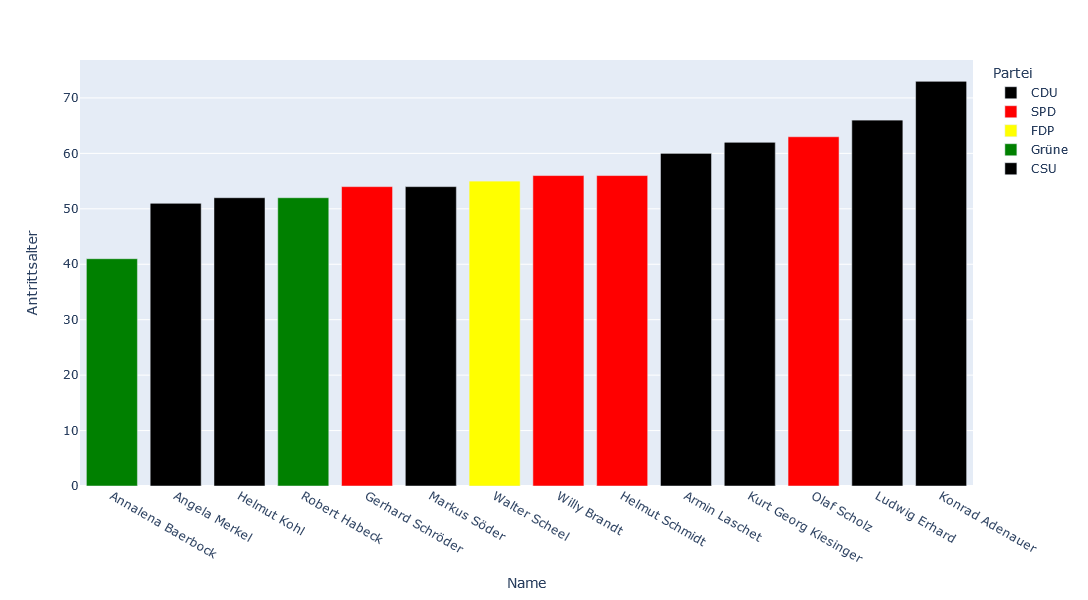

In [15]:
import plotly.express as px
fig1 = px.bar(df, x='Name', y='Antrittsalter',
             hover_data=['Name', 'Amtsantritt', "Abtritt"], color='Partei', height=600, width=800, color_discrete_map={
                "CDU":"black",
                "SPD": "red",
                "Grüne": "green",
                "FDP": "yellow",
                "CSU": "black"})
fig1.update_layout(xaxis={'categoryorder':'total ascending'})
fig1.show()

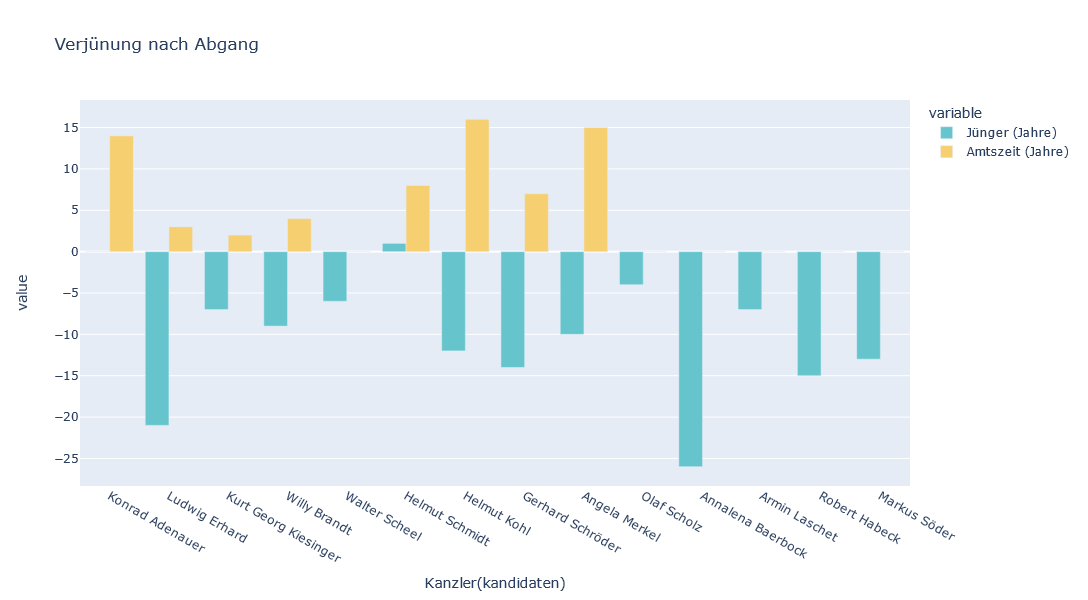

In [13]:
fig2 = px.bar(df, x='Name', y=['Jünger (Jahre)',"Amtszeit (Jahre)"],
             hover_data=['Name', 'Amtsantritt', "Abtritt"], 
             
             height=600, width=800, 
             #color_discrete_map={
             #   "CDU":"black",
             #   "CSU": "black",
             #   "SPD": "red",
             #   "Grüne": "green",
             #   "FDP": "yellow",
             #   }, 
             #color='Partei', 
             barmode='group',
             labels={'Name':'Kanzler(kandidaten)',"['Jünger als VorgängerIn in Jahren','Amtszeit in Jahren']":"Altersunterschied"},
             color_discrete_sequence=px.colors.qualitative.Pastel,
             title="Verjünung nach Abgang")
#fig2.update_layout(xaxis={'categoryorder':'total ascending'})
fig2.show()

In [ ]:
filename = 'antrittsalter.html'
plotly.offline.plot(fig1, filename=filename)

filename = 'verjungung.html'
plotly.offline.plot(fig2, filename=filename)